<a href="https://colab.research.google.com/github/gosandayo/Exercises_for_Akari/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.10

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
olivetti = fetch_olivetti_faces()
print(olivetti.target)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29

偏らないデータ分割のためにStratifiedShuffleSplitを利用．

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X = olivetti.data
y = olivetti.target

train_val_idx, test_idx = next(split.split(X, y))
X_train_val = X[train_val_idx]
y_train_val = y[train_val_idx]
X_test = X[test_idx]
y_test = y[test_idx]

train_idx, val_idx = next(split.split(X_train_val, y_train_val))
X_train = X_train_val[train_idx]
X_val = X_train_val[val_idx]
y_train = y_train_val[train_idx]
y_val = y_train_val[val_idx]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(256, 4096) (256,)
(64, 4096) (64,)
(80, 4096) (80,)


KMeans法で学習．

In [ ]:
models = []
k = range(5,120,5)
for i in k:
  kmeans = KMeans(n_clusters=i, n_init = 10, random_state=42)
  kmeans.fit(X_train)
  models.append(kmeans)
  print("k=",i)



k= 5
k= 10
k= 15
k= 20
k= 25
k= 30
k= 35
k= 40
k= 45
k= 50
k= 55
k= 60
k= 65
k= 70
k= 75
k= 80
k= 85
k= 90
k= 95
k= 100
k= 105
k= 110
k= 115


シルエットスコアでkを選択．

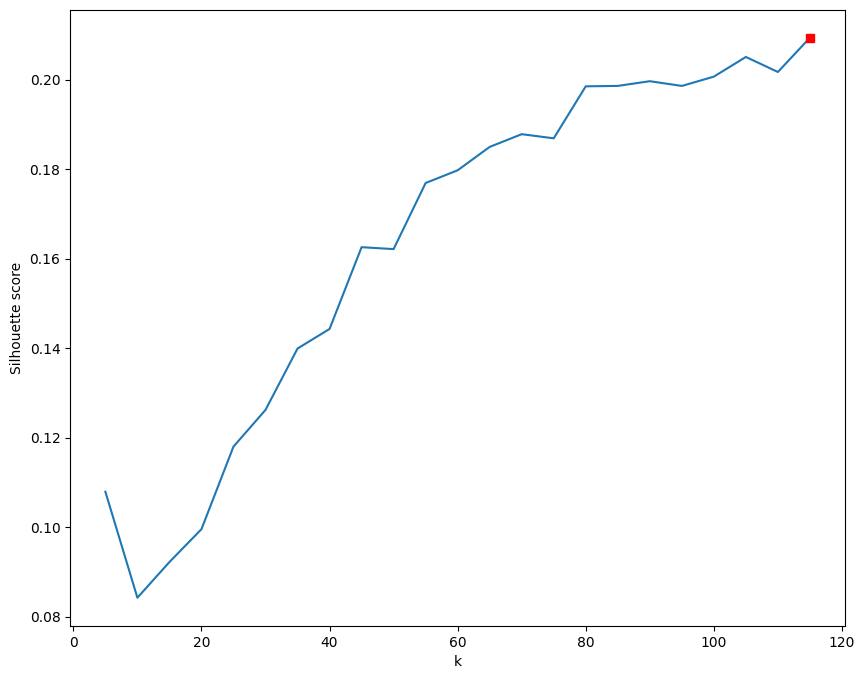

In [ ]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np


scores = []
for model in models:
  score = silhouette_score(X_train, model.labels_)
  scores.append(score)

best_idx = np.argmax(scores)
best_score = scores[best_idx]
best_k = k[best_idx]

plt.figure(figsize = (10,8))
plt.plot(k, scores)
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.show()

まだ上がりそうなので，kのscopeを増やしてみる

In [ ]:
models = []
k = range(5,180,5)
for i in k:
  kmeans = KMeans(n_clusters=i, n_init = 10, random_state=42)
  kmeans.fit(X_train)
  models.append(kmeans)
  print("k=",i)

k= 5
k= 10
k= 15
k= 20
k= 25
k= 30
k= 35
k= 40
k= 45
k= 50
k= 55
k= 60
k= 65
k= 70
k= 75
k= 80
k= 85
k= 90
k= 95
k= 100
k= 105
k= 110
k= 115
k= 120
k= 125
k= 130
k= 135
k= 140
k= 145
k= 150
k= 155
k= 160
k= 165
k= 170
k= 175


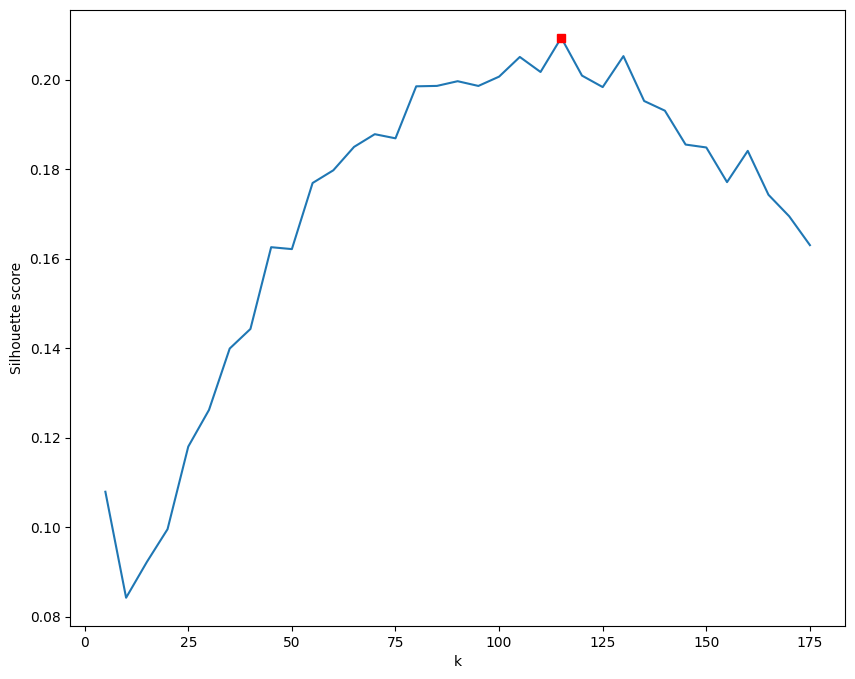

In [ ]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np


scores = []
for model in models:
  score = silhouette_score(X_train, model.labels_)
  scores.append(score)

best_idx = np.argmax(scores)
best_score = scores[best_idx]
best_k = k[best_idx]

plt.figure(figsize = (10,8))
plt.plot(k, scores)
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.show()

In [ ]:
print(best_k)

115


最良のkがわかったのでこれを採用する．

In [ ]:
best_model = models[best_idx]

Cluster 1


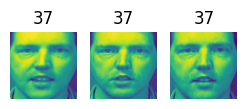

Cluster 2


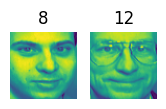

Cluster 3


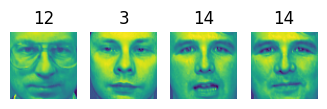

Cluster 4


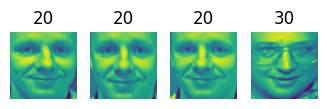

Cluster 5


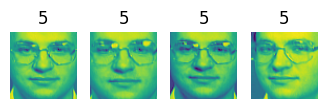

Cluster 6


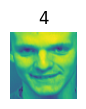

Cluster 7


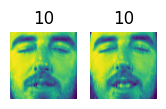

Cluster 8


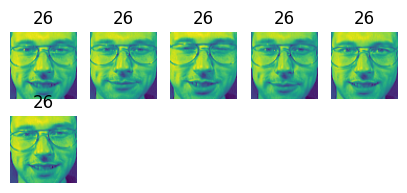

Cluster 9


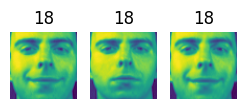

Cluster 10


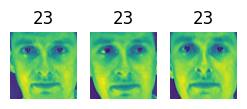

Cluster 11


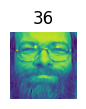

Cluster 12


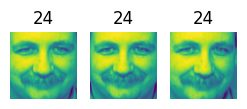

Cluster 13


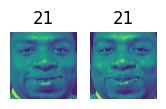

Cluster 14


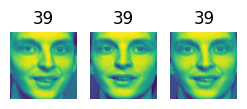

Cluster 15


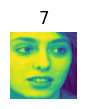

Cluster 16


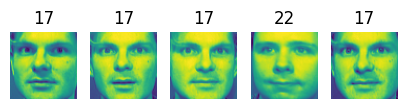

Cluster 17


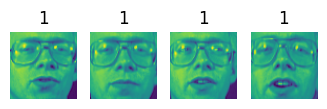

Cluster 18


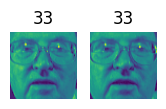

Cluster 19


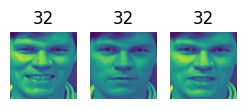

Cluster 20


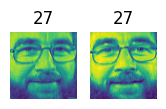

Cluster 21


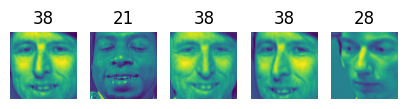

Cluster 22


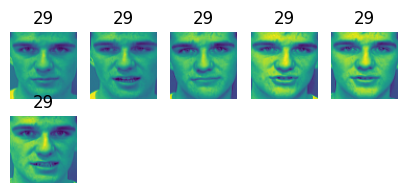

Cluster 23


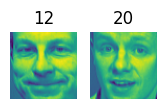

Cluster 24


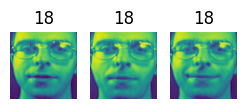

Cluster 25


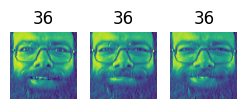

Cluster 26


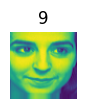

Cluster 27


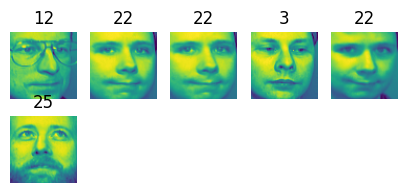

Cluster 28


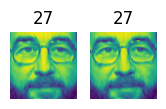

Cluster 29


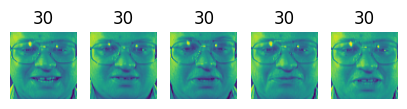

Cluster 30


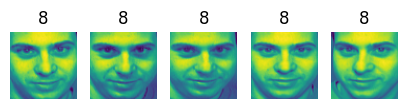

Cluster 31


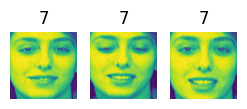

Cluster 32


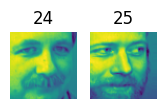

Cluster 33


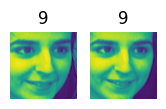

Cluster 34


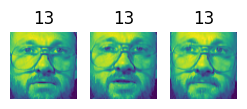

Cluster 35


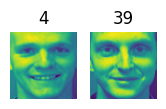

Cluster 36


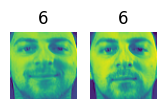

Cluster 37


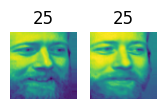

Cluster 38


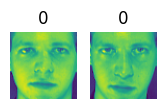

Cluster 39


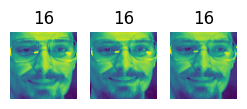

Cluster 40


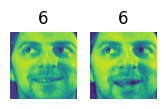

Cluster 41


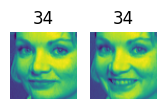

Cluster 42


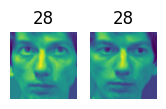

Cluster 43


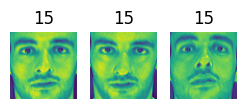

Cluster 44


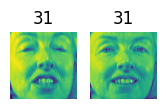

Cluster 45


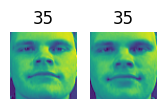

Cluster 46


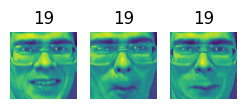

Cluster 47


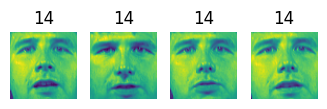

Cluster 48


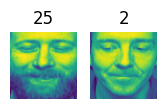

Cluster 49


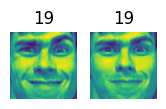

Cluster 50


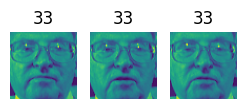

Cluster 51


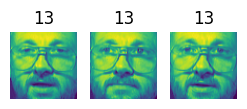

Cluster 52


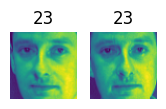

Cluster 53


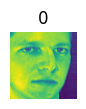

Cluster 54


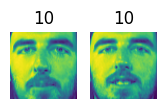

Cluster 55


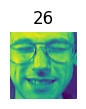

Cluster 56


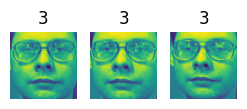

Cluster 57


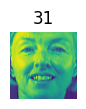

Cluster 58


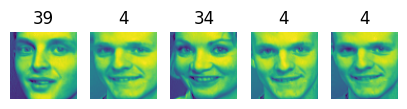

Cluster 59


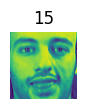

Cluster 60


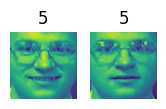

Cluster 61


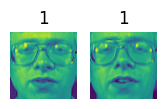

Cluster 62


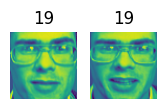

Cluster 63


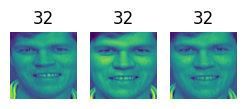

Cluster 64


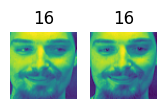

Cluster 65


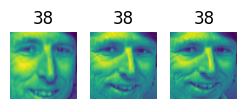

Cluster 66


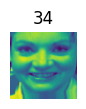

Cluster 67


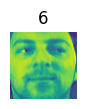

Cluster 68


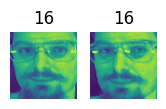

Cluster 69


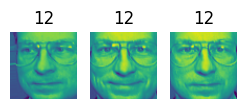

Cluster 70


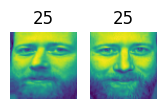

Cluster 71


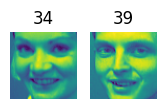

Cluster 72


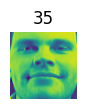

Cluster 73


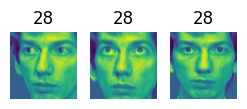

Cluster 74


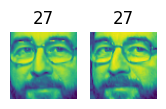

Cluster 75


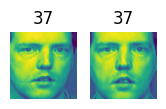

Cluster 76


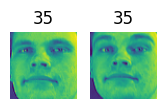

Cluster 77


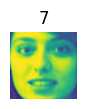

Cluster 78


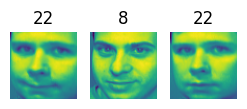

Cluster 79


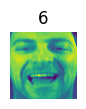

Cluster 80


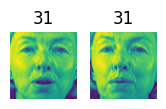

Cluster 81


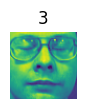

Cluster 82


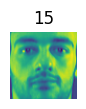

Cluster 83


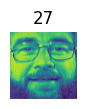

Cluster 84


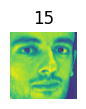

Cluster 85


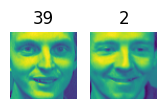

Cluster 86


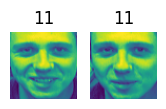

Cluster 87


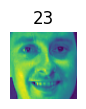

Cluster 88


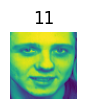

Cluster 89


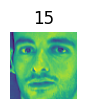

Cluster 90


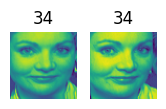

Cluster 91


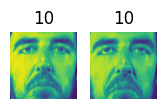

Cluster 92


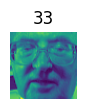

Cluster 93


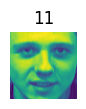

Cluster 94


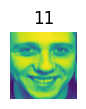

Cluster 95


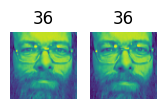

Cluster 96


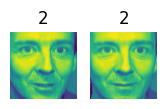

Cluster 97


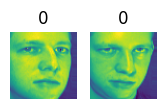

Cluster 98


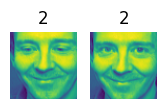

Cluster 99


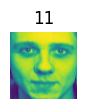

Cluster 100


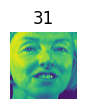

Cluster 101


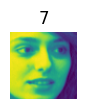

Cluster 102


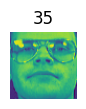

Cluster 103


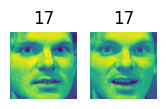

Cluster 104


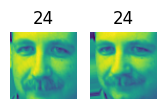

Cluster 105


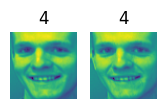

Cluster 106


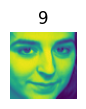

Cluster 107


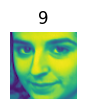

Cluster 108


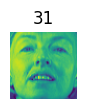

Cluster 109


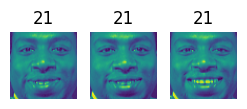

Cluster 110


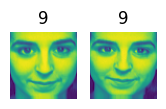

Cluster 111


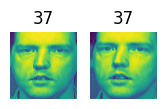

Cluster 112


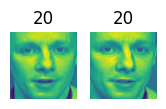

Cluster 113


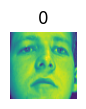

Cluster 114


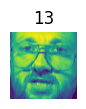

Cluster 115


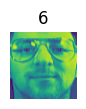

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face)
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id + 1)
    idx = best_model.labels_==cluster_id
    faces = X_train[idx]
    labels = y_train[idx]
    plot_faces(faces, labels)

40人しかいないのだから，115クラスタというのは多すぎたが，それなりに同じクラスタには同じ顔をした画像が入っていそうである．
感じたこととしては，顔の向きにかなり敏感に反応しているような印象を受ける．同じ顔の人でも違うクラスタに配分されている画像は，顔の向きが違うことが多い．

# 9.11

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(n_estimators=100, random_state=42)
rdf.fit(X_train, y_train)
rdf.score(X_val, y_val)

0.9375

PCAで次元削減する．

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

rdf = RandomForestClassifier(n_estimators=100, random_state=42)
rdf.fit(X_train_pca, y_train)
rdf.score(X_val_pca, y_val)

0.921875

先ほど学習させたKMeansで次元削減してみる．

In [ ]:
X_train_reduced = best_model.transform(X_train)
X_val_reduced = best_model.transform(X_val)
X_test_reduced = best_model.transform(X_test)

rdf = RandomForestClassifier(n_estimators=100, random_state=42)
rdf.fit(X_train_reduced, y_train)
rdf.score(X_val_reduced, y_val)

0.796875

かなりひどい．kをチューニングしてみる．

In [ ]:

for n_clusters in k:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )

    pipeline.fit(X_train, y_train)
    print(n_clusters, pipeline.score(X_val, y_val))

5 0.59375
10 0.6875
15 0.75
20 0.703125
25 0.734375
30 0.734375
35 0.765625
40 0.78125
45 0.765625
50 0.75
55 0.75
60 0.765625
65 0.78125
70 0.765625
75 0.796875
80 0.78125
85 0.765625
90 0.78125
95 0.75
100 0.75
105 0.78125
110 0.75
115 0.796875
120 0.796875
125 0.78125
130 0.78125
135 0.796875
140 0.78125
145 0.8125
150 0.765625
155 0.765625
160 0.75
165 0.765625
170 0.78125
175 0.78125


kの選び方の問題ではない様である．

In [ ]:
X_train_new = np.c_[X_train, X_train_reduced]
X_test_new = np.c_[X_test, X_test_reduced]
X_val_new = np.c_[X_val, X_val_reduced]

In [ ]:
rdf = RandomForestClassifier(n_estimators=100, random_state=42)
rdf.fit(X_train_new, y_train)
rdf.score(X_val_new, y_val)

0.90625

# 9.12

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=50, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [ ]:
n_faces = 30
new_faces_reduced, new_label = gm.sample(n_samples=n_faces)
new_faces = pca.inverse_transform(new_faces_reduced)

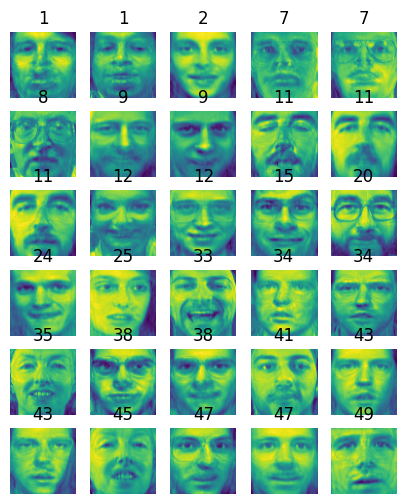

In [ ]:
plot_faces(new_faces, new_label)

かなりそれっぽい顔ができた．

画像を回転させてみる．

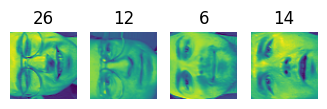

In [ ]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
X_rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

plot_faces(X_rotated, y_rotated)

In [ ]:
X_rotated_pca = pca.transform(X_rotated)
gm.score_samples(X_rotated_pca)

array([-25341254.29040706, -44245573.69940848, -26714056.24369051,
       -21527350.84303017])

訓練セットの確率密度と比較してみる．

In [ ]:
gm.score_samples(X_train_pca[:10])

array([549.15524646, 569.62307894, 553.62514217, 571.39896479,
       570.61762713, 556.23285791, 548.11115996, 505.46500981,
       586.06788495, 531.46935917])

前者の方が圧倒的に確率密度の値が小さく，これにより異常値の検出ができていることがわかる．

# 9.13

In [ ]:
pca = PCA(n_components=0.95).fit(X_train)

def reconstruction_error(pca, X):
  X_pca = pca.transform(X)
  X_reconstructed = pca.inverse_transform(X_pca)
  mse = np.square(X_reconstructed - X).mean()
  return mse



In [ ]:
error_train = reconstruction_error(pca, X_train)
error_rotated = reconstruction_error(pca, X_rotated)

print("error(train):", error_train)
print("error(rotated):", error_rotated)

error(train): 0.00095169997
error(rotated): 0.010847091


後者の方が再構築誤差が大きい（それもそのはず）

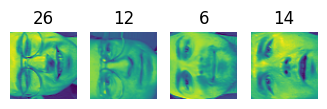

In [ ]:
plot_faces(X_rotated, y_rotated)

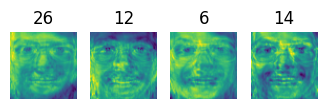

In [ ]:
X_rotated_reconstructed = pca.inverse_transform(X_rotated_pca)
plot_faces(X_rotated_reconstructed, y_rotated)

顔の向きが横になっているイメージから復元しようとしているため，再現された顔は元の画像とはあまり似ない．